<a href="https://colab.research.google.com/github/neeha9gaju/PIGraph-Influence-Analysis/blob/main/Piman_flask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from ast import literal_eval

In [ ]:
def read_text(file_name):
	data = pd.read_csv(file_name,delimiter=',', encoding="utf-8-sig")
	return data

In [ ]:
# read repo data
repo_df = read_text("./merged_flask_repos.csv")
repo_df.shape

(400, 12)

In [ ]:
repo_df.columns

Index(['repo', 'author', 'created_date', 'last_updated_date',
       'contributors_list', 'watchers_list', 'forkers_list', 'stargazers_list',
       'assignees_list', 'pull_commenter', 'parent', 'issuers_list'],
      dtype='object')

In [ ]:
repo_df["last_updated_date"] = pd.to_datetime(repo_df["last_updated_date"]).dt.strftime("%Y-%m-%d %H:%M:%S")
repo_df["created_date"] = pd.to_datetime(repo_df["created_date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
repos_list = repo_df['repo']
authors_list = repo_df['author']
created_date_list = repo_df['created_date']
last_updated_date_list = repo_df['last_updated_date']

In [ ]:
import datetime as dt
def get_datetime(date):
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])
    hour = int(date[11:13])
    mint = int(date[14:16])
    secd = int(date[17:])

    return dt.datetime(year, month, day, hour, mint, secd)

get_datetime(last_updated_date_list[0])

datetime.datetime(2022, 12, 27, 21, 42)

In [ ]:
repo_created_date_map = {}

for i in range(len(repos_list)):
    date = get_datetime(created_date_list[i])
    repo_created_date_map[repos_list[i]] = date
repo_update_date_map = {}
for i in range(len(repos_list)):
    date = get_datetime(last_updated_date_list[i])
    repo_update_date_map[repos_list[i]] = date
repo_life_map = {}
for repo in repos_list:
    repo_life_map[repo] = repo_update_date_map[repo] - repo_created_date_map[repo]
repo_life_map

{'Ketouem/flask-boto3': datetime.timedelta(days=2465, seconds=80640),
 'level12/flask-webtest': datetime.timedelta(days=3505, seconds=62040),
 'delsner/flask-angular-data-science': datetime.timedelta(days=2226, seconds=86100),
 'toddbirchard/flasklogin-tutorial': datetime.timedelta(days=1799, seconds=58260),
 'kritikaparmar-programmer/HealthCheck': datetime.timedelta(days=1214, seconds=64980),
 'johnnncodes/building-a-blog-using-flask-and-angularjs': datetime.timedelta(days=3320, seconds=60960),
 'cgauge/Flask-AWSCognito': datetime.timedelta(days=1564, seconds=34980),
 'dushan14/books-store': datetime.timedelta(days=1969, seconds=28680),
 'hypebeast/ansible-flask-stack': datetime.timedelta(days=2271, seconds=11700),
 'johnwheeler/flask-live-starter': datetime.timedelta(days=2616, seconds=40140),
 'mayurvkorde/Flask-Application-On-IIS': datetime.timedelta(days=919, seconds=12900),
 'CharlyJazz/Flask-MVC-Template': datetime.timedelta(days=2410, seconds=25440),
 'fengsp/flask-profile': da

In [ ]:
parent_list = repo_df['parent']
parent_list.isnull().sum()

400

In [ ]:
contributors_list = repo_df['contributors_list']

In [ ]:
watchers_list = repo_df['watchers_list'].apply(literal_eval)

In [ ]:
forkers_list = repo_df['forkers_list'].apply(literal_eval)

In [ ]:
stargazers_list = repo_df['stargazers_list'].apply(literal_eval)

In [ ]:
assigness_list = repo_df['assignees_list'].apply(literal_eval)

In [ ]:
pull_commenters_list = repo_df['pull_commenter'].apply(literal_eval)

In [ ]:
issuers_list = repo_df['issuers_list'].apply(literal_eval)

# basic statistics

In [ ]:
def get_count_map(alist_of_list):
    count_map = {}
    for alist in alist_of_list:
        if len(alist) in count_map:
            count_map[len(alist)] += 1
        else:
            count_map[len(alist)] = 1
    count_map = {k: v for k, v in sorted(count_map.items(), key=lambda item: item[0])}
    return count_map

In [ ]:
contributors_count_map = get_count_map(contributors_list)
watchers_count_map = get_count_map(watchers_list)
forkers_count_map = get_count_map(forkers_list)
stargazers_count_map = get_count_map(stargazers_list)
assigness_count_map = get_count_map(assigness_list)
pull_commenters_count_map = get_count_map(pull_commenters_list)
issuers_count_map = get_count_map(issuers_list)

# remove benign things from the dataset

In [ ]:
def remove_benign_authors(alist_of_list, flask_authors):
    new_list = []
    for alist in alist_of_list:
        temp = []
        for val in alist:
            if val in flask_authors:
                temp.append(val)
        new_list.append(temp)
    return new_list


In [ ]:
contributors_list

0                ['Ketouem', 'boroivanov', 'iamjohnnym']
1      ['aromanovich', 'guruofgentoo', 'hnrd', 'bchop...
2                                            ['delsner']
3      ['toddbirchard', 'renovate-bot', 'dependabot[b...
4      ['kritikaparmar-programmer', 'utkarsh0702', 'a...
                             ...                        
395    ['PierrePaul', 'abondis', 'vevmesteren', 'Caly...
396            ['marcuxyz', 'dependabot[bot]', 'taconi']
397            ['sbimochan', 'Basanta78', 'aviskarkc10']
398                             ['haxamxam', 'mariobox']
399                         ['pri1311', 'Jainam-Dharod']
Name: contributors_list, Length: 400, dtype: object

In [ ]:
contributors_list2 = remove_benign_authors(contributors_list, list(authors_list))
watchers_list2 = remove_benign_authors(watchers_list, list(authors_list))
forkers_list2 = remove_benign_authors(forkers_list, list(authors_list))
stargazers_list2 = remove_benign_authors(stargazers_list, list(authors_list))
assigness_list2 = remove_benign_authors(assigness_list, list(authors_list))
pull_commenters_list2 = remove_benign_authors(pull_commenters_list, list(authors_list))
issuers_list2 = remove_benign_authors(issuers_list, list(authors_list))
print()

In [ ]:
contributors_count_map2 = get_count_map(contributors_list2)
watchers_count_map2 = get_count_map(watchers_list2)
forkers_count_map2 = get_count_map(forkers_list2)
stargazers_count_map2 = get_count_map(stargazers_list2)
assigness_count_map2 = get_count_map(assigness_list2)
pull_commenters_count_map2 = get_count_map(pull_commenters_list2)
issuers_count_map2 = get_count_map(issuers_list2)

In [ ]:
def create_repo_author_map(alist_of_list, repos_list):
    repo_author_map = {}
    for i in range(0, len(repos_list)):
        if len(alist_of_list[i]) > 0:
                repo_author_map[repos_list[i]] = alist_of_list[i]
    return repo_author_map

In [ ]:
contributors_map = create_repo_author_map(contributors_list2, repos_list)
watchers_map = create_repo_author_map(watchers_list2, repos_list)
forkers_map = create_repo_author_map(forkers_list2, repos_list)
stargazers_map = create_repo_author_map(stargazers_list2, repos_list)
assigness_map = create_repo_author_map(assigness_list2, repos_list)
pull_commenters_map = create_repo_author_map(pull_commenters_list2, repos_list)
issuers_map = create_repo_author_map(issuers_list2, repos_list)

In [ ]:
repo_authors_map = {}
for i in range(0, len(repos_list)):
    repo_authors_map[repos_list[i]] = authors_list[i]
author_parent_map = {}
repo_parent_map = {}
parent_list = list(parent_list)
#count = 0
for i in range(0, len(authors_list)):
    if type(parent_list[i]) != float:
        author_parent_map[authors_list[i]] = parent_list[i]
        repo_parent_map[repos_list[i]] = parent_list[i]
    else:
        author_parent_map[authors_list[i]] = authors_list[i]
        repo_parent_map[repos_list[i]] = repos_list[i]

# user data

In [ ]:
user_df = read_text('./merged_flask_users.csv')
user_df.shape

(400, 5)

In [ ]:
user_df["updated_at"] = pd.to_datetime(user_df["updated_at"]).dt.strftime("%Y-%m-%d %H:%M:%S")
user_df["created_at"] = pd.to_datetime(user_df["created_at"]).dt.strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
author_from_udata = user_df['author']
created_date_author = user_df['created_at']
update_date_author = user_df['updated_at']
repo_count_list = user_df['repo_count']

In [ ]:
author_created_date_map = {}
for i in range(len(author_from_udata)):
    date = get_datetime(created_date_author[i])
    author_created_date_map[author_from_udata[i]] = date
author_update_date_map = {}
for i in range(len(author_from_udata)):
    date = get_datetime(update_date_author[i])
    author_update_date_map[author_from_udata[i]] = date
author_life_map = {}
for author in author_from_udata:
    author_life_map[author] = author_update_date_map[author] - author_created_date_map[author]
author_life_map

{'Ketouem': datetime.timedelta(days=2465, seconds=80612),
 'level12': datetime.timedelta(days=3505, seconds=62087),
 'delsner': datetime.timedelta(days=2226, seconds=86078),
 'toddbirchard': datetime.timedelta(days=1799, seconds=58281),
 'kritikaparmar-programmer': datetime.timedelta(days=1214, seconds=64956),
 'johnnncodes': datetime.timedelta(days=2460, seconds=50931),
 'cgauge': datetime.timedelta(days=1564, seconds=35011),
 'dushan14': datetime.timedelta(days=1969, seconds=28669),
 'hypebeast': datetime.timedelta(days=2271, seconds=11699),
 'johnwheeler': datetime.timedelta(days=2616, seconds=40161),
 'mayurvkorde': datetime.timedelta(days=919, seconds=12887),
 'CharlyJazz': datetime.timedelta(days=2410, seconds=25415),
 'fengsp': datetime.timedelta(days=3072, seconds=7378),
 'danionescu0': datetime.timedelta(days=2595, seconds=81186),
 'sunscrapers': datetime.timedelta(days=2507, seconds=20403),
 'twaldear': datetime.timedelta(days=3173, seconds=59051),
 'gtancev': datetime.timede

In [ ]:
followers_list = user_df['followers_list'].apply(literal_eval)
followers_list2 = remove_benign_authors(followers_list, list(authors_list))

In [ ]:
author_follower_map = {}
for i in range(0, len(author_from_udata)):
    author_follower_map[author_from_udata[i]] = followers_list2[i]

In [ ]:
def construct_graph(graph_data):
  G = nx.DiGraph()
  for index,edges in enumerate(graph_data):
      if(len(edges) == 0):
        continue;
      G.add_node(index)  # Ensure all nodes are added
      for edge in edges:
        G.add_edge(index,edge)
  return G

# create author-author network

In [ ]:
pip install networkx

In [ ]:
import networkx as nx
aa = nx.DiGraph()

In [ ]:
def get_avg_degree(G):
    degrees = G.degree()
    degrees = dict(degrees)
    sum_of_edges = sum(degrees.values())
    no_nodes = G.number_of_nodes()
    if(no_nodes == 0):
      return 0;
    avg_degree = 2 * sum_of_edges / no_nodes
    return avg_degree

In [ ]:
follower = construct_graph(followers_list2)
contributor = construct_graph(contributors_list2)
stargazers = construct_graph(stargazers_list2)
watcher = construct_graph(watchers_list2)
commenter = construct_graph(pull_commenters_list2)
issuer = construct_graph(issuers_list2)
print()
forker = construct_graph(forkers_list2)
print()

In [ ]:
d_follower = 1 if get_avg_degree(follower) == 0 else get_avg_degree(follower)
d_fork = 1 if get_avg_degree(forker) == 0 else get_avg_degree(forker)
d_star = 1 if get_avg_degree(stargazers) == 0 else get_avg_degree(stargazers)
d_watch = 1 if get_avg_degree(watcher) == 0 else get_avg_degree(watcher)
d_contributor = 1 if get_avg_degree(contributor) == 0 else get_avg_degree(contributor)
d_commenter = 1 if get_avg_degree(commenter) == 0 else get_avg_degree(commenter)

d_min = d_commenter
w_follower = d_min/d_follower
w_fork = d_min/d_fork
w_star = d_min/d_star
w_watch = d_min/d_watch
w_contributor = d_min/d_contributor
w_commenter = d_min / d_commenter

In [ ]:
for author in author_from_udata:
    if len(author_follower_map[author]) != 0:
        for follower in author_follower_map[author]:
            aa.add_weighted_edges_from([(follower, author, w_follower)])

aa

In [ ]:
followers_nodes = len(list(aa.nodes))
followers_edges = len(list(aa.edges))

In [ ]:
# add edge from forking relationship
update_count = 0
new_edge_fork = 0
for repo, forkers in forkers_map.items():
    original_author = repo_authors_map[repo]
    #print("orginal :", original_author)
    for user in forkers:
        #print( aa.number_of_edges(user, original_author))
        if aa.has_edge(user, original_author):
            #print("Already edges there")
            old_weight = aa.get_edge_data(user, original_author)['weight']
            #print(old_weight)
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_fork)])
            update_count += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_fork)])
            new_edge_fork += 1

In [ ]:
total_nodes = len(list(aa.nodes))
total_edges = len(list(aa.edges))
#new_edges = total_edges - update_count
new_nodes = total_nodes - followers_nodes
print("Total nodes after adding forking edge: ", total_nodes)
print("Total edges after adding forking edge: ", total_edges)
print("Number of edges that have been updated: ", update_count)
print("Number of new edges that have been added: ", new_edge_fork)
print("Number of new nodes that have been added: ", new_nodes)

Total nodes after adding forking edge:  6
Total edges after adding forking edge:  3
Number of edges that have been updated:  0
Number of new edges that have been added:  3
Number of new nodes that have been added:  6


In [ ]:
# add edges from stars behavior
update_in_stars = 0
new_edge = 0
starrer = 0
for repo, stargazers in stargazers_map.items():
    original_author = repo_authors_map[repo]
    for user in stargazers:
        starrer += 1
        if aa.has_edge(user, original_author):
            old_weight = aa.get_edge_data(user, original_author)['weight']
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_star)])
            update_in_stars += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_star)])
            new_edge += 1

In [ ]:
total_nodes_adding_stars = len(list(aa.nodes))
total_edges_adding_stars = len(list(aa.edges))

print("Total nodes after adding starring edge: ",total_nodes_adding_stars)
print("Total edges after adding starring edge: ", total_edges_adding_stars)
print("Number of edges that have been updated: ", update_in_stars)
print("Number of new edges that have been added: ", new_edge)
print("total starrer: ", starrer)

Total nodes after adding starring edge:  80
Total edges after adding starring edge:  78
Number of edges that have been updated:  0
Number of new edges that have been added:  75
total starrer:  75


In [ ]:
# add edges from watches behavior
update_in_watches = 0
new_edge = 0
watcher = 0
for repo, watchers in watchers_map.items():
    original_author = repo_authors_map[repo]
    for user in watchers:
        watcher += 1
        if aa.has_edge(user, original_author):
            old_weight = aa.get_edge_data(user, original_author)['weight']
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_watch)])
            update_in_watches += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_watch)])
            new_edge += 1

In [ ]:
total_nodes_adding_watches = len(list(aa.nodes))
total_edges_adding_watches = len(list(aa.edges))
print("Total nodes after adding watching edge: ",total_nodes_adding_watches)
print("Total edges after adding watching edge: ", total_edges_adding_watches)
print("Number of edges that have been updated: ", update_in_watches)
print("Number of new edges that have been added: ", new_edge)
print("total watcher: ", watcher)

Total nodes after adding watching edge:  202
Total edges after adding watching edge:  219
Number of edges that have been updated:  48
Number of new edges that have been added:  141
total watcher:  189


In [ ]:
# add edges from contributors behavior
update_in_contributors = 0
new_edge = 0
contributor = 0
for repo, contributors in contributors_map.items():
    original_author = repo_authors_map[repo]
    for user in contributors:
        contributor += 1
        if aa.has_edge(user, original_author):
            old_weight = aa.get_edge_data(user, original_author)['weight']
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_contributor)])
            update_in_contributors += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_contributor)])
            new_edge += 1

In [ ]:
# add edges from commenting behavior
update_in_commenters = 0
new_edge = 0
commenter = 0
for repo, issuers in issuers_map.items():
    original_author = repo_authors_map[repo]
    for user in issuers:
        contributor += 1
        if aa.has_edge(user, original_author):
            old_weight = aa.get_edge_data(user, original_author)['weight']
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_commenter)])
            update_in_commenters += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_commenter)])
            new_edge += 1

# compute popular/famous/influential authors

In [ ]:
from sklearn import preprocessing as prep

def normalized_score(score_map):
    authors = []
    values = []
    for key, val in score_map.items():
        authors.append(key)
        values.append(val)
    values = prep.normalize([values])
    #print(len(values))
    new_map = {}
    for i in range(len(authors)):
        new_map[authors[i]] = values[0][i]
    return new_map

In [ ]:
hubs, authorities = nx.hits(aa, max_iter = 150, normalized = True)
sorted_auth = {k: v for k, v in sorted(authorities.items(), key=lambda item: item[1])}
sorted_hubs = {k: v for k, v in sorted(hubs.items(), key=lambda item: item[1])}
auths = normalized_score(sorted_auth)
hubs = normalized_score(sorted_hubs)

hubs, auths

({'danionescu0': -5.812051366185792e-17,
  'marcuxyz': -5.681689253318479e-17,
  'miguelgrinberg': -1.568498209399861e-17,
  'COUR4G3': -1.4704727888565666e-17,
  'msoedov': -1.1510741176997885e-17,
  'raoumairwaheed': -7.965294821381012e-18,
  'kb22': -6.422119760458297e-18,
  'marktennyson': -6.3059511450959954e-18,
  'diegoinacio': -5.99849804828458e-18,
  'faizanbashir': -5.354476122181559e-18,
  'su600': -5.0945668058948514e-18,
  'dtiesling': -5.071891436549933e-18,
  'cvitter': -4.911545015842929e-18,
  'jhorneman': -4.120921826819461e-18,
  'johnnncodes': -3.948696943311031e-18,
  'tiangolo': -3.7570909596966276e-18,
  'bobbui': -3.5101859765347245e-18,
  'dqminh': -3.482094450678175e-18,
  'macloo': -3.315940809274174e-18,
  'Santhoshkumard11': -3.240968263370414e-18,
  'AmyangXYZ': -2.7716828207539033e-18,
  'moinudeen': -2.554330718668236e-18,
  'mattupstate': -2.2881577507209504e-18,
  'kvesteri': -1.703711743531651e-18,
  'dineshpiyasamara': -1.647468354383287e-18,
  'gaot

# compute RepoPop

In [ ]:
# compute repository popularity using stars-forks-watch
watchers_counts = []
stargazers_counts = []
forkers_counts = []
for i in range(len(repos_list)):
    watchers_counts.append(len(watchers_list2[i]))
    stargazers_counts.append(len(stargazers_list2[i]))
    forkers_counts.append(len(forkers_list2[i]))

In [ ]:
import numpy as np
from sklearn import preprocessing as prep

watchers_counts = np.array(watchers_counts)
watchers_counts = prep.normalize([watchers_counts])
watchers_counts = watchers_counts.tolist()


forkers_counts = np.array(forkers_counts)
forkers_counts = prep.normalize([forkers_counts])
forkers_counts = forkers_counts.tolist()


stargazers_counts = np.array(stargazers_counts)
stargazers_counts = prep.normalize([stargazers_counts])
stargazers_counts = stargazers_counts.tolist()

In [ ]:
stargazers_counts = stargazers_counts[0]
watchers_counts = watchers_counts[0]
forkers_counts = forkers_counts[0]

In [ ]:
repo_popularity_map = {}

for i in range(len(repos_list)):
    score = watchers_counts[i]/3 + forkers_counts[i]/3 + stargazers_counts[i]/3
    repo_popularity_map[repos_list[i]] = score
#repo_popularity_map

# Compute plausibility score

In [ ]:
authors_repo_map = {}
for repo,author in repo_authors_map.items():
    if author in authors_repo_map:
        authors_repo_map[author].append(repo)
    else:
        authors_repo_map[author] = [repo]
#authors_repo_map

In [ ]:
total_stargazers = 0
total_forkers = 0
total_watchers = 0
total_contributors = 0
total_issuers = 0
for repo in repos_list:
    if repo in stargazers_map:
        total_stargazers += len(stargazers_map[repo])
    if repo in forkers_map:
        total_forkers += len(forkers_map[repo])
    if repo in watchers_map:
        total_watchers += len(watchers_map[repo])
    if repo in contributors_map:
        total_contributors += len(contributors_map[repo])
    if repo in issuers_map:
        total_issuers += len(issuers_map[repo])

total_stargazers /= len(repos_list)
total_forkers /= len(repos_list)
total_watchers /= len(repos_list)
total_issuers += total_contributors
total_issuers /= len(repos_list)
total_stargazers, total_forkers, total_watchers, total_issuers

(0.245, 0.0125, 0.6175, 0.31)

In [ ]:
wc = 1
ws = total_issuers/total_stargazers
wf = total_issuers/total_forkers
ww = total_issuers/total_watchers
ws, wf, ww, wc

(1.2653061224489797, 24.799999999999997, 0.5020242914979757, 1)

In [ ]:
total_follower = 0
for key, val in author_follower_map.items():
    total_follower += len(val)
print(total_follower)
total_follower/len(author_follower_map)

0


0.0

In [ ]:
def get_other_repo_contributions(stargazers_map):
    number_of_authors = len(set(authors_list))
    count = 0
    temp_map = {}
    for repo, stars in stargazers_map.items():
        repo_author = repo[:repo.find('/')]
        if repo_author in temp_map:
            temp_map[repo_author].extend(stars)
        else:
            temp_map[repo_author] = stars

    for key, val in temp_map.items():
        list_count = len(val)
        set_count = len(set(val))
        count += list_count/set_count
    other_repo_contributors = count/number_of_authors

    return other_repo_contributors

In [ ]:
other_repo_contributors = get_other_repo_contributions(stargazers_map) + get_other_repo_contributions(watchers_map) + get_other_repo_contributions(forkers_map)
other_repo_contributors



0.9045138888888888

In [ ]:
w_fol = 1
w_orc = 0.46/other_repo_contributors
w_orc

0.5085604606525912

In [ ]:
def compute_plausibility(repo1, repo2):
    author1 = repo_authors_map[repo1]
    author2 = repo_authors_map[repo2]
    date1 = repo_created_date_map[repo1]
    date2 = repo_created_date_map[repo2]
    time = date1 - date2

    if time.days < 0:
        return 0

    star_score = 0
    if repo1 in stargazers_map:
        if author2 in stargazers_map[repo1]:
            star_score = 1

    fork_score = 0
    if repo1 in forkers_map:
        if author2 in forkers_map[repo1]:
            fork_score = 1

    follow_score = 0
    if author1 in author_follower_map:
        if author2 in author_follower_map[author1]:
            follow_score = 1

    other_repo_star_score = 0
    if author1 in authors_repo_map:
        if len(authors_repo_map[author1]) > 1:
            for repo in authors_repo_map[author1]:
                if repo in stargazers_map:
                    if author2 in stargazers_map[repo]:
                        other_repo_star_score += 1

    other_repo_fork_score = 0
    if author1 in authors_repo_map:
        if len(authors_repo_map[author1]) > 1:
            for repo in authors_repo_map[author1]:
                if repo in forkers_map:
                    if author2 in forkers_map[repo]:
                        other_repo_fork_score += 1

    watch_score = 0
    if repo1 in watchers_map:
        if author2 in watchers_map[repo1]:
            watch_score = 1

    contribution_score = 0
    if repo1 in contributors_map:
        if author2 in contributors_map[repo1]:
            contribution_score = 1

    comment_score = 0
    if repo1 in issuers_map:
        if author2 in issuers_map[repo1]:
            comment_score = 1

    famous_score = 0
    if author1 in hubs and author2 in hubs:
        if hubs[author1] > hubs[author2]:
            famous_score = 1
    ra_score = (star_score * 0.62) + (fork_score*0.19) + (watch_score*0.34) + ((contribution_score+comment_score))
    aa_score = follow_score + 0.61 * (other_repo_fork_score + other_repo_star_score)
    popularity = (famous_score/2) + repo_popularity_map[repo1]/2
    plausibility = 0.65 * ra_score + 0.25 * aa_score + 0.1 * popularity

    return plausibility

In [ ]:
# Given repository A, find which repos it has influenced
repo_influenced_repos = {}
influenced_me_repos = {} # Given repository A, find the repos it has influenced repo A
for repo1 in repos_list:
    for repo2 in repos_list:
        if repo_authors_map[repo1] != repo_authors_map[repo2]:
            plausibility = compute_plausibility(repo1, repo2)
            if plausibility > 0.2:
                if repo1 in repo_influenced_repos:
                    repo_influenced_repos[repo1].append([repo2,plausibility])
                else:
                    repo_influenced_repos[repo1] = [[repo2,plausibility]]

                if repo2 in influenced_me_repos:
                    influenced_me_repos[repo2].append([repo1, plausibility])
                else:
                    influenced_me_repos[repo2] = [repo1, plausibility]

In [ ]:
repo_influenced_repos['level12/flask-webtest']
repo_authors_map
influenced_me_repos['mjhea0/flask-intro']

['level12/flask-webtest',
 0.40458910431540934,
 ['johnwheeler/flask-live-starter', 0.40617820863081866],
 ['dternyak/Flask-Postgres-Docker', 0.405641094987239],
 ['miguelgrinberg/Flask-Runner', 0.558141094987239],
 ['mardix/propel-legacy', 0.405641094987239],
 ['mattfinnell/flask-webpack-cookiecutter', 0.40458910431540934],
 ['level09/enferno', 0.405641094987239],
 ['Depado/flask-skeleton', 0.405641094987239],
 ['level12/flask-webtest', 0.40458910431540934],
 ['johnwheeler/flask-live-starter', 0.40617820863081866],
 ['dternyak/Flask-Postgres-Docker', 0.405641094987239],
 ['miguelgrinberg/Flask-Runner', 0.558141094987239],
 ['mardix/propel-legacy', 0.405641094987239],
 ['mattfinnell/flask-webpack-cookiecutter', 0.40458910431540934],
 ['level09/enferno', 0.405641094987239],
 ['Depado/flask-skeleton', 0.405641094987239],
 ['tsileo/flask-yeoman', 0.405641094987239],
 ['vitalk/flask-styleguide', 0.6097301993026483],
 ['testdrivenio/flask-celery-project', 0.2220519906718297],
 ['bobbui/prom

# PIG

In [ ]:
high_degree_repos=[]

In [ ]:
def create_pig(threshold):
    pig = nx.DiGraph()

    for repo1 in repos_list:
        for repo2 in repos_list:
            if repo_authors_map[repo1] != repo_authors_map[repo2]:
                plausibility = compute_plausibility(repo1, repo2)
                if plausibility >= 0.06:
                    high_degree_repos.append((repo1,repo2))
                if plausibility >= threshold:
                    if pig.has_edge(repo1, repo2):
                        continue
                    else:
                        pig.add_weighted_edges_from([(repo1, repo2, plausibility)])
    return pig

In [ ]:
pig = create_pig(0.06)

In [ ]:
print(len(high_degree_repos))
high_degree_repos

40


[('level12/flask-webtest', 'mjhea0/flask-intro'),
 ('johnwheeler/flask-live-starter', 'mjhea0/flask-intro'),
 ('kb22/ML-React-App-Template', 'macloo/flask-forms'),
 ('kb22/Understanding-Flask-and-Flask-RESTPlus', 'macloo/flask-forms'),
 ('dternyak/Flask-Postgres-Docker', 'mjhea0/flask-intro'),
 ('miguelgrinberg/Flask-Runner', 'mjhea0/flask-intro'),
 ('mardix/propel-legacy', 'mjhea0/flask-intro'),
 ('mattfinnell/flask-webpack-cookiecutter', 'mjhea0/flask-intro'),
 ('level09/enferno', 'mjhea0/flask-intro'),
 ('Depado/flask-skeleton', 'mjhea0/flask-intro'),
 ('level12/flask-webtest', 'mjhea0/flask-intro'),
 ('johnwheeler/flask-live-starter', 'mjhea0/flask-intro'),
 ('kb22/ML-React-App-Template', 'macloo/flask-forms'),
 ('kb22/Understanding-Flask-and-Flask-RESTPlus', 'macloo/flask-forms'),
 ('dternyak/Flask-Postgres-Docker', 'mjhea0/flask-intro'),
 ('miguelgrinberg/Flask-Runner', 'mjhea0/flask-intro'),
 ('mardix/propel-legacy', 'mjhea0/flask-intro'),
 ('mattfinnell/flask-webpack-cookiecutt

In [ ]:
threshold = 0.8
#t_list = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
t_list = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5]
deg = []
nodes = []
edges = []
repos = []
repo_count = []

for t in t_list:
    pig = create_pig(t)
    repo_tup = {t:[]}
    no_nodes = len(list(pig.nodes))
    no_edges = len(list(pig.edges))
    avg_deg = no_edges/no_nodes
    for index,value in enumerate(pig.nodes):
      if(index < 2):
        repo_tup[t].append(value);
    repos.append(repo_tup)
    repo_count.append(no_nodes)
    print(repo_count)
    deg.append(avg_deg)
    nodes.append(no_nodes)
    edges.append(no_edges)
    print(t, " : avg degree - ", avg_deg, " no of nodes - ", no_nodes, " no of edges - ", no_edges)

[299]
0.0  : avg degree -  297.9130434782609  no of nodes -  299  no of edges -  89076
[299, 213]
0.01  : avg degree -  56.57276995305164  no of nodes -  213  no of edges -  12050
[299, 213, 213]
0.02  : avg degree -  56.57276995305164  no of nodes -  213  no of edges -  12050
[299, 213, 213, 213]
0.03  : avg degree -  56.57276995305164  no of nodes -  213  no of edges -  12050
[299, 213, 213, 213, 213]
0.04  : avg degree -  56.57276995305164  no of nodes -  213  no of edges -  12050
[299, 213, 213, 213, 213, 213]
0.05  : avg degree -  56.57276995305164  no of nodes -  213  no of edges -  12050
[299, 213, 213, 213, 213, 213, 26]
0.06  : avg degree -  0.9615384615384616  no of nodes -  26  no of edges -  25
[299, 213, 213, 213, 213, 213, 26, 26]
0.07  : avg degree -  0.9615384615384616  no of nodes -  26  no of edges -  25
[299, 213, 213, 213, 213, 213, 26, 26, 26]
0.08  : avg degree -  0.9615384615384616  no of nodes -  26  no of edges -  25
[299, 213, 213, 213, 213, 213, 26, 26, 26, 2

In [ ]:
for i in range(len(t_list)):
    deg[i] = edges[i]/nodes[i]
    print(t_list[i]," : avg degree: ", deg[i], ", no of nodes: ", nodes[i])

0.0  : avg degree:  297.9130434782609 , no of nodes:  299
0.0  : avg degree:  297.9130434782609 , no of nodes:  299
0.02  : avg degree:  53.610328638497656 , no of nodes:  213
0.03  : avg degree:  53.610328638497656 , no of nodes:  213
0.04  : avg degree:  53.610328638497656 , no of nodes:  213
0.05  : avg degree:  53.610328638497656 , no of nodes:  213
0.06  : avg degree:  0.9629629629629629 , no of nodes:  27
0.07  : avg degree:  0.9629629629629629 , no of nodes:  27
0.08  : avg degree:  0.9629629629629629 , no of nodes:  27
0.09  : avg degree:  0.9629629629629629 , no of nodes:  27
0.1  : avg degree:  0.9629629629629629 , no of nodes:  27
0.2  : avg degree:  0.9565217391304348 , no of nodes:  23
0.3  : avg degree:  0.9444444444444444 , no of nodes:  18
0.4  : avg degree:  0.9444444444444444 , no of nodes:  18
0.5  : avg degree:  0.6666666666666666 , no of nodes:  6
0.6  : avg degree:  0.6666666666666666 , no of nodes:  3


In [ ]:
len(repos_list)

400

<Figure size 800x480 with 0 Axes>

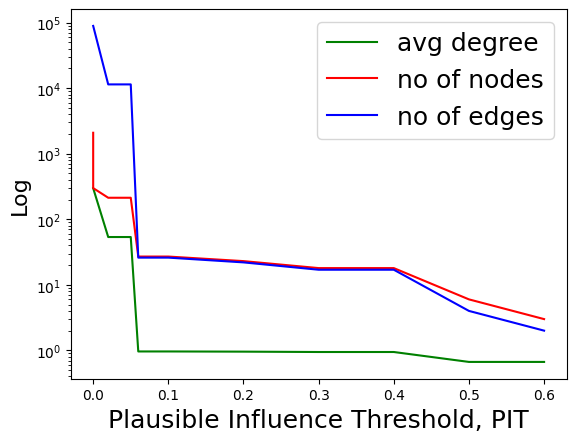

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

nodes[0] = 2089
fig = plt.figure()
plt.plot(t_list, deg, color='green', label = 'avg degree')
plt.plot(t_list, nodes, color='red', label = 'no of nodes')
plt.plot(t_list, edges, color='blue', label = 'no of edges')
plt.legend(loc = 'upper right', fontsize=18)
plt.yscale("log")
plt.xlabel("Plausible Influence Threshold, PIT", fontsize=18)
plt.ylabel("Log", fontsize=16)
plt.show()
fig.savefig('pis_threshold.png')

[('Ketouem/flask-boto3', 48), ('level12/flask-webtest', 11), ('johnnncodes/building-a-blog-using-flask-and-angularjs', 2), ('fengsp/flask-profile', 17), ('ynakayama/flask-hello', 16), ('hasankhan/pyMVC', 10), ('codesagar/Azure-Blobs', 11), ('aws-troutman/magic8ball-flask', 35), ('johnnncodes/note-taking-app', 3), ('msoedov/flask-graphql-example', 1), ('miguelgrinberg/Flask-Runner', 1), ('mbr/flask-appconfig', 11), ('mertcangokgoz/TimeTable', 39), ('angstwad/elemental', 9), ('kvesteri/flask-storage', 2), ('level09/enferno', 27), ('mattupstate/ansible-tutorial', 2), ('yoshiya0503/Hermetica', 18), ('nidhinp/Paintapp-Flask-PostgreSQL', 22), ('albertogg/flask-bootstrap-skel', 10), ('dorotawm/quizr-flask', 15), ('tsileo/flask-yeoman', 18), ('marchibbins/teela', 25), ('fogleman/HelloFlask', 2), ('lmeunier/flaskup', 4), ('ContinuumIO/flask-ssl-authentication', 27), ('sebsto/signup-flask-nginx-docker', 8), ('jarodl/flask-github', 1), ('jvuori/flask-uwsgi-nginx-haproxy-docker', 10), ('fnava621/c

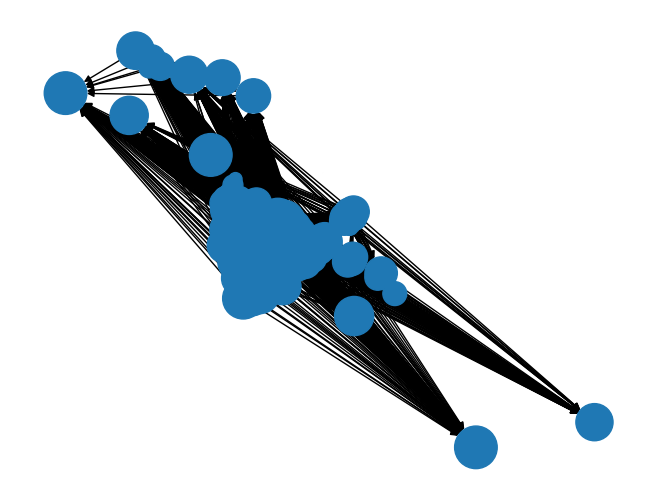

In [ ]:
pig = create_pig(0.05)
d = pig.degree()
print(pig.out_degree())

nodelist = []
node_size = []
for key, val in pig.degree():
    nodelist.append(key)
    node_size.append(val * 5)

nx.draw(pig, nodelist=nodelist, node_size=node_size)

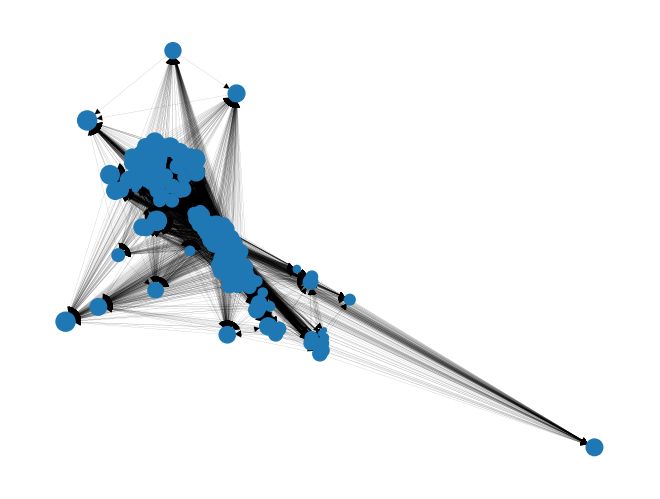

In [ ]:
pig = create_pig(0.05)
d = pig.degree()

nodelist = []
node_size = []
for key, val in pig.degree():
    nodelist.append(key)
    node_size.append(val * 1)
weights = nx.get_edge_attributes(pig, 'weight').values()

nx.draw(pig, nodelist=nodelist, node_size=node_size, width=list(weights))

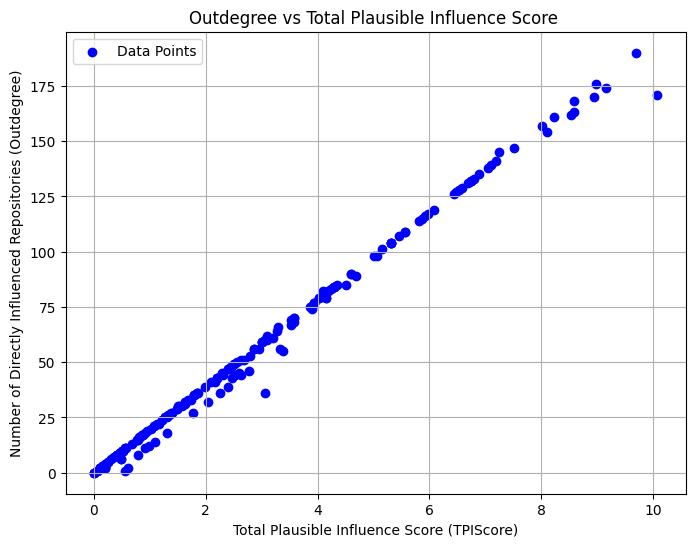

([2.450495552247823,
  0.9204801474695025,
  0.10210398134365935,
  0.8678838414211043,
  0.8168318507492747,
  0.5105199067182968,
  0.5615718973901265,
  1.7868196735140378,
  0.15315597201548903,
  0.05158910431540932,
  0.558141094987239,
  0.579052044859629,
  1.9910276362013564,
  0.45946791604646714,
  0.10528218997447798,
  1.7743095646554516,
  0.10210398134365935,
  0.918935832092934,
  1.1231437947802525,
  0.52641094987239,
  0.765779860077445,
  1.3005397097703015,
  1.2762997667957414,
  0.10528218997447798,
  0.2042079626873187,
  1.3929058165160515,
  0.40841592537463745,
  0.05158910431540932,
  0.5105199067182968,
  0.35736393470280775,
  0,
  0.8770147733619583,
  0.30631194403097806,
  0.40841592537463745,
  1.6847156921703785,
  1.5315597201548896,
  1.089975329821346,
  0.10528218997447798,
  0.10528218997447798,
  1.0210398134365932,
  0.984693139846868,
  0.35736393470280775,
  1.7868196735140378,
  0.5615718973901265,
  0.21056437994895597,
  0.473769854885151,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

weight = []
degrees = []
def graph_out_edges():
  outedges = []
  outdegree = []
  for i in pig.nodes():
    outedges = pig.out_edges(i, data=True)  # Get outgoing edges for the node, including edge data
    degrees.append(pig.out_degree(i))  # Out-degree for the node
    weight.append(sum([data['weight'] for _, _, data in outedges]))
  return weight,degrees


def scatter_plot():
  weight,degree = graph_out_edges()
  outdegree = np.array(degree)  # Number of directly influenced repositories
  tpiscore = np.array(weight)
  plt.figure(figsize=(8, 6))
  plt.scatter(tpiscore, outdegree, color='blue', label='Data Points')
  plt.title('Outdegree vs Total Plausible Influence Score ')
  plt.xlabel('Total Plausible Influence Score (TPIScore)')
  plt.ylabel('Number of Directly Influenced Repositories (Outdegree)')
  plt.legend()
  plt.grid(True)
  plt.show()

scatter_plot()

graph_out_edges()

In [ ]:
for repo in repos:
  for key,value in repo.items():
      print(key,value)
repo_count

0.0 ['Ketouem/flask-boto3', 'level12/flask-webtest']
0.01 ['Ketouem/flask-boto3', 'sh4nks/flask-plugins']
0.02 ['Ketouem/flask-boto3', 'sh4nks/flask-plugins']
0.03 ['Ketouem/flask-boto3', 'sh4nks/flask-plugins']
0.04 ['Ketouem/flask-boto3', 'sh4nks/flask-plugins']
0.05 ['Ketouem/flask-boto3', 'sh4nks/flask-plugins']
0.06 ['level12/flask-webtest', 'mjhea0/flask-intro']
0.07 ['level12/flask-webtest', 'mjhea0/flask-intro']
0.08 ['level12/flask-webtest', 'mjhea0/flask-intro']
0.09 ['level12/flask-webtest', 'mjhea0/flask-intro']
0.1 ['level12/flask-webtest', 'mjhea0/flask-intro']
0.2 ['level12/flask-webtest', 'mjhea0/flask-intro']
0.3 ['level12/flask-webtest', 'mjhea0/flask-intro']
0.4 ['level12/flask-webtest', 'mjhea0/flask-intro']
0.5 ['miguelgrinberg/Flask-Runner', 'mjhea0/flask-intro']


[299, 213, 213, 213, 213, 213, 26, 26, 26, 26, 26, 24, 18, 18, 6]

In [ ]:
outdeg1 = [299, 213, 213, 213, 213, 213, 26, 26, 26, 26, 26, 24, 18, 18, 6]
thresh = [0.0, 0.01, 0.02, 0.03 ,0.04,0.05 ,0.06 ,0.07 ,0.08 ,0.09 ,0.1 ,0.2 ,0.3 ,0.4 ,0.5]
outdeg2 = [400, 387, 253, 253, 253, 253, 121, 24, 24, 24, 24, 21, 17, 17, 4]

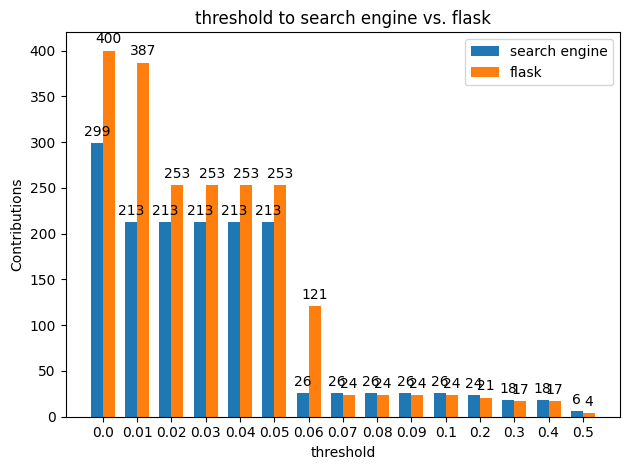

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: number of contributions to Repo1 and Repo2 over 6 months


# Creating the bar positions
x = np.arange(len(thresh))  # the label locations
width = 0.35  # the width of the bars

# Creating the plot
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, outdeg1, width, label='search engine')
bars2 = ax.bar(x + width/2, outdeg2, width, label='flask')

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('threshold')
ax.set_ylabel('Contributions')
ax.set_title('threshold to search engine vs. flask')
ax.set_xticks(x)
ax.set_xticklabels(thresh)
ax.legend()

# Function to add value labels on top of each bar
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding value labels to the bars
add_value_labels(ax, bars1)
add_value_labels(ax, bars2)

# Display the plot
plt.tight_layout()
plt.show()
